##### MACHINE LEARNING ASSIGNMENT SUBMISSION- MANOHAR SINGH

##### IMPORT VARIOUS LIBRARY IN JUPITOR NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

###### Load the dataset

df = pd.read_csv(r'C:\Users\HP\Downloads\oil_spill.csv')


# Q1: Data Cleaning and Pre-processing

In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicate rows
df.drop_duplicates(inplace=True)

Missing values per column:
 f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64


# Q2: Pre-processing Methods (Scaling, Encoding)


In [3]:
# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize the data (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Q3: Insights from Dataset (EDA)

C:\Users\HP\AppData\Local\Temp\ipykernel_7964\4259338923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


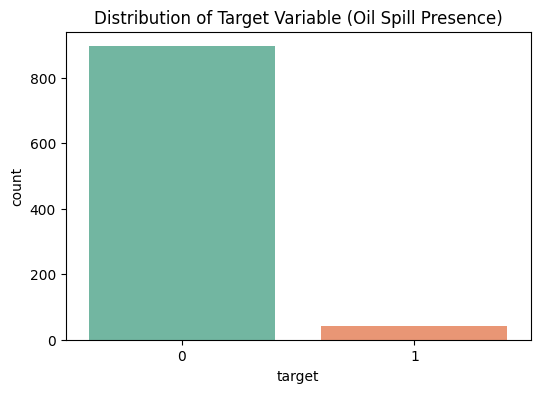

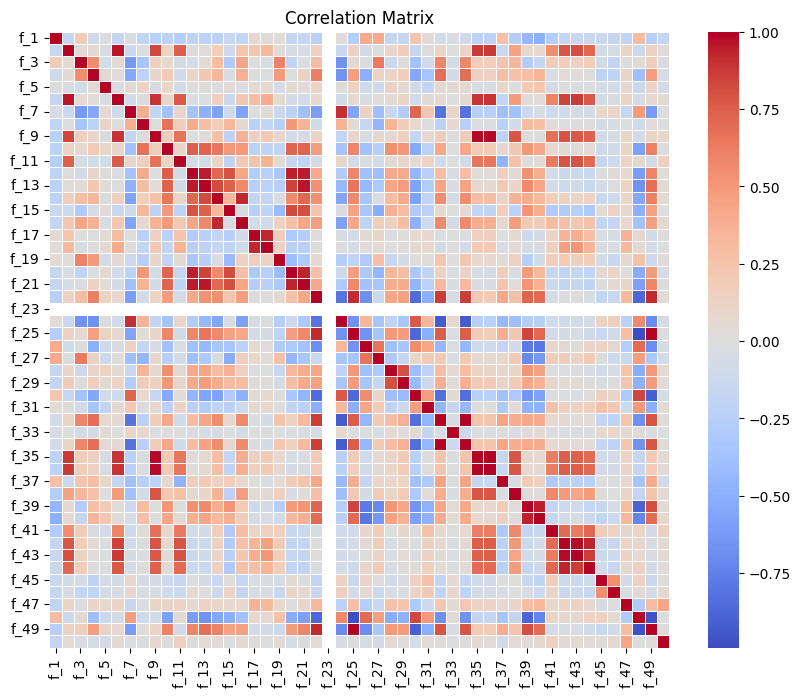

In [4]:
# Plotting target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Oil Spill Presence)')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Q4: Apply Machine Learning Techniques

In [5]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Bagging Classifier (Ensemble method) with updated parameter name
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)


# Evaluate the Bagging Classifier
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))

# Model Evaluation (accuracy comparison)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging}")

# Choose the best model (Bagging seems best if it's more accurate)
best_model = bagging if accuracy_bagging > accuracy_rf else rf

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       182
           1       0.50      0.33      0.40         6

    accuracy                           0.97       188
   macro avg       0.74      0.66      0.69       188
weighted avg       0.96      0.97      0.96       188

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.33      0.50         6

    accuracy                           0.98       188
   macro avg       0.99      0.67      0.74       188
weighted avg       0.98      0.98      0.97       188

Random Forest Accuracy: 0.9680851063829787
Bagging Classifier Accuracy: 0.9787234042553191


# Q5: Save and Load the Best Model

In [6]:
# Save the best model
model_filename = 'best_oil_spill_model.pkl'
joblib.dump(best_model, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Q6: Apply Saved Model on New Data


In [7]:
# Randomly pick 20 data points
sample_data = df.sample(20)
sample_X = sample_data.drop(columns=['target'])
sample_X_scaled = scaler.transform(sample_X)
sample_y = sample_data['target']

# Predict on the sample data
sample_predictions = loaded_model.predict(sample_X_scaled)
print(f"Predictions on new data: {sample_predictions}")
print(f"Actual values: {sample_y.values}")

Predictions on new data: [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Actual values: [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
